In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
studentInfo = pd.read_csv('./anonymisedData/studentinfo.csv')
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [13]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [15]:
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [14]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [16]:
studentInfo = studentInfo.fillna(studentInfo.mode().iloc[0])
studentInfo.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [18]:
studentInfo['gender']

0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object

gender
M    17875
F    14718
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

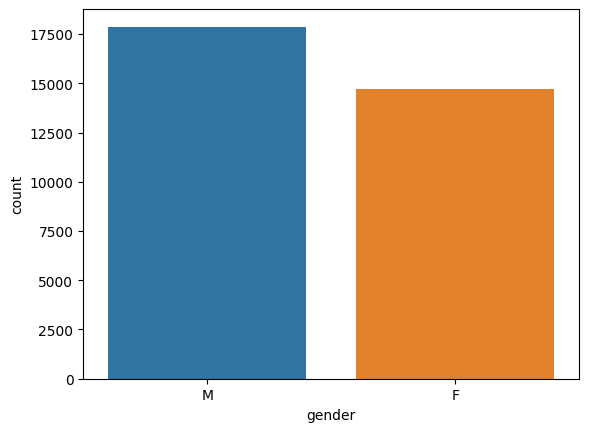

In [20]:
print(studentInfo['gender'].value_counts())
sns.countplot(x='gender', data=studentInfo)

terlihat dari hasil diatas jenis kelamin dari laki-laki dan perempuan dengan total 32592, dapat dibuktikan bahwa lebih dominan jenis kelamin laki- laki daripada perempuan

<Axes: xlabel='age_band'>

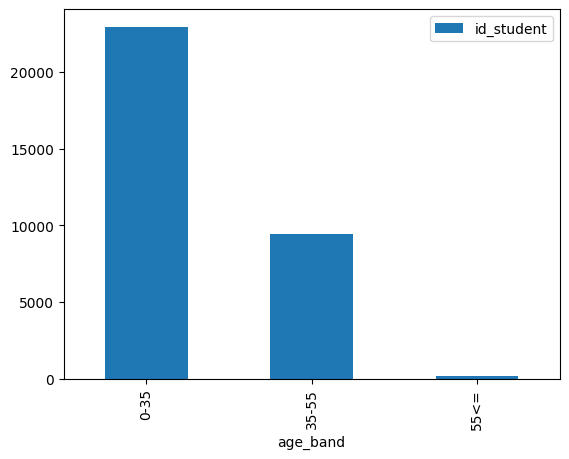

In [21]:
studentInfo[['id_student', 'age_band']].groupby(by = 'age_band').count().plot.bar()

kelompok siswa yang sudah terdaftar berasal dari kelompok usia 0-35 tahun 

<Axes: ylabel='region'>

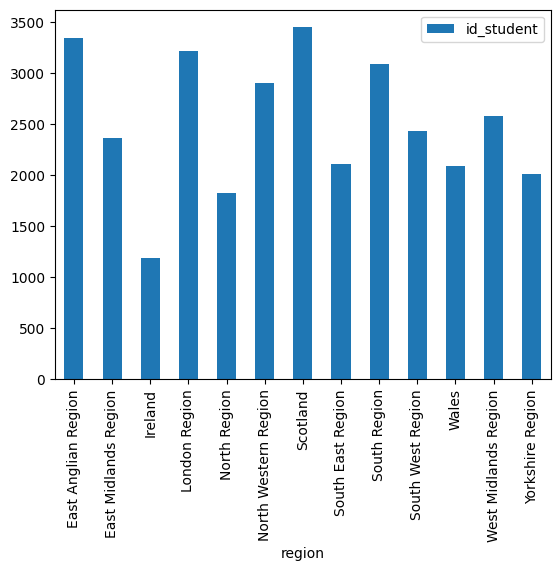

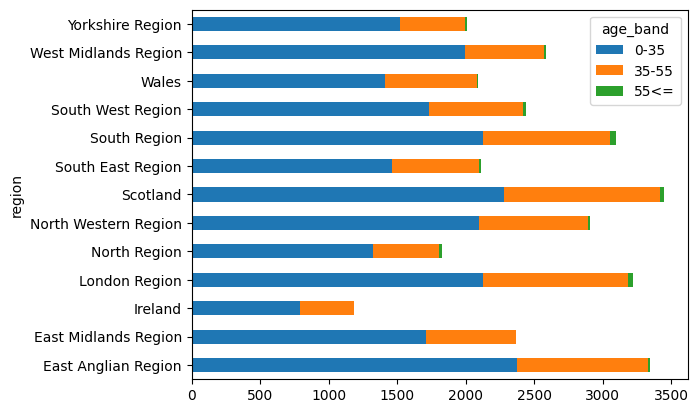

In [30]:
studentInfo[['id_student', 'region']].groupby(by = 'region').count().plot.bar()
pd.crosstab(studentInfo.region, studentInfo.age_band).plot.barh(stacked = True)

dari hasil kedua diatas dibuktikan bahwa daerah yang sangat aktif adalah east anglian, scotland, london region dan siswa yang lulus pada kelompok 0-35 tahun dan diikuti oleh kelompok 35-55 tahun. 

In [31]:
assessments = pd.read_csv('./anonymisedData/assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [32]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [33]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [34]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [35]:
assessments = assessments.fillna(assessments.mode().iloc[0])
assessments.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

Mari cek untuk pembobotan tiap assessment

In [36]:
assessments.groupby(['code_module', 'code_presentation']).agg(total_weigth=('weight', sum))

total_weigth
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

mayoritas pembobotannya adalah diangka 200. tetapi pada modul CCC dan GGG terdapat kekeliruan yang mana bobot pada modul CCC adalah 300 untuk tiap presentation dan pada modul GGG hanya 100 bobotnya. selanjut harus di teliti lebih dalam untuk pembagian bobot pada tipe asesmennya

In [38]:
assessments[assessments['code_module'].isin(['CCC', 'GGG'])].groupby(['code_module', 'code_presentation', 'assessment_type']).agg(type_weight=('weight', sum))

type_weight
code_module code_presentation assessment_type             
CCC         2014B             CMA                     25.0
                              Exam                   200.0
                              TMA                     75.0
            2014J             CMA                     25.0
                              Exam                   200.0
                              TMA                     75.0
GGG         2013J             CMA                      0.0
                              Exam                   100.0
                              TMA                      0.0
            2014B             CMA                      0.0
                              Exam                   100.0
                              TMA                      0.0
            2014J             CMA                      0.0
                              Exam                   100.0
                              TMA                      0.0

pada modul CCC nilai EXAM (UJIAN) sudah berbobot 200. hal inilah yang menyebabkan bobot untuk asseessment menjadi 300.

lalu pada GGG, tipe bobot hanya dinilai pada ujian saja. 

untuk permasalahan modul CCC, bobot exam bisa dibagi dua (menjadi 100)
lalu pada modul GGG bisa ditambahkan ke salah satu tipe asesmen. dan yang akan diberikan bobot adalah TMA (tutor marked assessment) / tugas dari dosen

In [39]:
assessments.loc[(assessments['code_module'] == 'CCC') & (assessments['assessment_type'] == 'Exam'), 'weight'] = \
assessments.loc[(assessments['code_module'] == 'CCC') & (assessments['assessment_type'] == 'Exam'), 'weight']/2

assessments.loc[(assessments['code_module'] == 'GGG') & (assessments['assessment_type'] == 'TMA'), 'weight'] = (100/3)

In [40]:
assessments.groupby(['code_module', 'code_presentation']).agg(total_weigth=('weight', sum))


total_weigth
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     200.0
            2014J                     200.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

analisis pada tabel LMS

In [41]:
studentVle = pd.read_csv('./anonymisedData/studentVle.csv')
vle = pd.read_csv('./anonymisedData/vle.csv')

In [43]:
# cekn nilai null pada studentvle
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

data yang bersih tanpa missing value.

In [44]:
# cek niai null pada vle
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

ada 5000 data null pada week_from dan week_to. mari cek untuk total datanya

In [46]:
vle['id_site'].count()

6364

ada 6364. berarti sekitar 82% data hilang. oleh karena itu maka dihapus saja untuk kolom week_from dan week_to

In [47]:
vle.drop(columns=['week_from', 'week_to'], inplace=True)
vle.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
dtype: int64

In [48]:
# gabungkan tabel student vle dengan vle
merge_vle_studVle = pd.merge(studentVle, vle, on=['code_module', 'code_presentation', 'id_site'])
merge_vle_studVle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng
...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent
10655276,GGG,2014J,499187,896969,228,8,oucontent
10655277,GGG,2014J,629258,896969,228,23,oucontent
10655278,GGG,2014J,534672,896969,228,1,oucontent


mari lihat total klik siswa untuk tiap tipe aktivitas

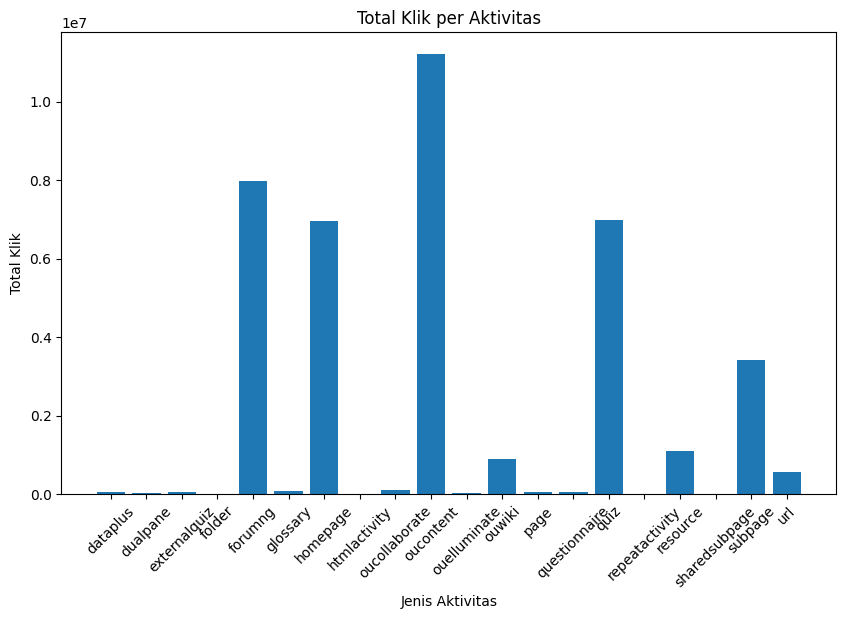

In [49]:
# Menghitung total klik per aktivitas (type of content)
total_klik_per_aktivitas = merge_vle_studVle.groupby('activity_type')['sum_click'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_klik_per_aktivitas['activity_type'], total_klik_per_aktivitas['sum_click'])
plt.xlabel('Jenis Aktivitas')
plt.ylabel('Total Klik')
plt.title('Total Klik per Aktivitas')
plt.xticks(rotation=45)
plt.show()

siswa mayoritas membuka tipe oucontent lalu ada banyak juga yang mengakses forum, homepage, dan kuis

lalu mari cek untuk rata rata siswa mengklik aktivitas per modulnya

In [53]:
group_data_avg_activity_per_module = merge_vle_studVle.groupby(['code_module', 'activity_type'])['sum_click'].mean().reset_index()
group_data_avg_activity_per_module.rename(columns={'sum_click': 'avg_click'}, inplace=True)

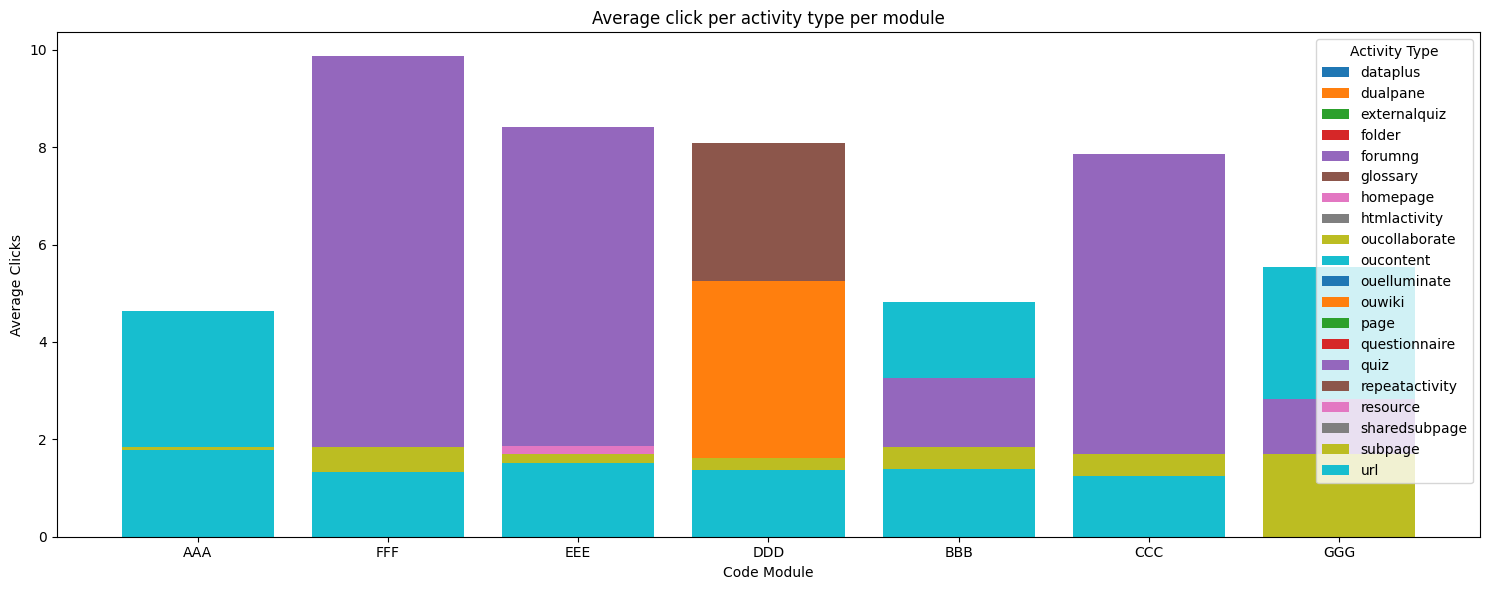

In [54]:
plt.figure(figsize=(15, 6))
for activity_type, group in group_data_avg_activity_per_module.groupby('activity_type'):
    plt.bar(group['code_module'], group['avg_click'], label=activity_type)
    
plt.xlabel('Code Module')
plt.ylabel('Average Clicks')
plt.title('Average click per activity type per module')
plt.legend(title='Activity Type')

plt.tight_layout()
plt.show()

Informasi yang bisa didapatkan dari grafik diatas adalah:
1. activity_tyoe yang memiliki rata-rata klik terbanyak ada pada quiz di modul FFF, EEE, dan CCC
2. rata rata klik terbanyak kedua ada pada glosarium pada modul DDD